In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
# Open dateset of population
population = pd.read_csv('population.csv')
population.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,OA,Annual population,184,Rwanda,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2000,2000,1000 persons,7933.681,X,International reliable sources,NaN
1,OA,Annual population,184,Rwanda,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2001,2001,1000 persons,8231.156,X,International reliable sources,NaN
2,OA,Annual population,184,Rwanda,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2002,2002,1000 persons,8427.060,X,International reliable sources,NaN
3,OA,Annual population,184,Rwanda,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2003,2003,1000 persons,8557.161,X,International reliable sources,NaN
4,OA,Annual population,184,Rwanda,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2004,2004,1000 persons,8680.524,X,International reliable sources,NaN


In [3]:
population.describe()

,Area Code,Element Code,Item Code,Year Code,Year,Value,Note
count,20.0,20.0,20.0,20.00000,20.00000,20.000000,0.0
mean,184.0,511.0,3010.0,2009.50000,2009.50000,10050.974200,NaN
std,0.0,0.0,0.0,5.91608,5.91608,1445.692422,NaN
min,184.0,511.0,3010.0,2000.00000,2000.00000,7933.681000,NaN
25%,184.0,511.0,3010.0,2004.75000,2004.75000,8800.292250,NaN
50%,184.0,511.0,3010.0,2009.50000,2009.50000,9911.054000,NaN
75%,184.0,511.0,3010.0,2014.25000,2014.25000,11154.990250,NaN
max,184.0,511.0,3010.0,2019.00000,2019.00000,12626.950000,NaN


In [4]:
# Open data set for production
production = pd.read_csv('production.csv')
production.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QD,Crops Processed,184,Rwanda,5510,Production,162,Sugar Raw Centrifugal,2000,2000,tonnes,4000,*,Unofficial figure
1,QD,Crops Processed,184,Rwanda,5510,Production,162,Sugar Raw Centrifugal,2001,2001,tonnes,6000,*,Unofficial figure
2,QD,Crops Processed,184,Rwanda,5510,Production,162,Sugar Raw Centrifugal,2002,2002,tonnes,7000,*,Unofficial figure
3,QD,Crops Processed,184,Rwanda,5510,Production,162,Sugar Raw Centrifugal,2003,2003,tonnes,7000,NaN,Official data
4,QD,Crops Processed,184,Rwanda,5510,Production,162,Sugar Raw Centrifugal,2004,2004,tonnes,7500,NaN,Official data


In [5]:
production.describe()

,Area Code,Element Code,Item Code,Year Code,Year,Value
count,19.0,19.0,19.0,19.000000,19.000000,19.000000
mean,184.0,5510.0,162.0,2009.000000,2009.000000,9235.421053
std,0.0,0.0,0.0,5.627314,5.627314,3010.460104
min,184.0,5510.0,162.0,2000.000000,2000.000000,4000.000000
25%,184.0,5510.0,162.0,2004.500000,2004.500000,7000.000000
50%,184.0,5510.0,162.0,2009.000000,2009.000000,9638.000000
75%,184.0,5510.0,162.0,2013.500000,2013.500000,10798.500000
max,184.0,5510.0,162.0,2018.000000,2018.000000,16000.000000


In [6]:
# Screen data to retain only needed columns population
population = population[population['Year'] != 2019]
population = population[['Year', 'Value', 'Unit']]
population.head()

,Year,Value,Unit
0,2000,7933.681,1000 persons
1,2001,8231.156,1000 persons
2,2002,8427.060,1000 persons
3,2003,8557.161,1000 persons
4,2004,8680.524,1000 persons


In [7]:
# add annual % increase per year on population
population['% change per year'] = population['Value'] // 100
population.head()

,Year,Value,Unit,% change per year
0,2000,7933.681,1000 persons,79.0
1,2001,8231.156,1000 persons,82.0
2,2002,8427.060,1000 persons,84.0
3,2003,8557.161,1000 persons,85.0
4,2004,8680.524,1000 persons,86.0


In [8]:
# Screen data to retain only needed columns for production
production = production[['Year', 'Value', 'Unit']]
production.head()

,Year,Value,Unit
0,2000,4000,tonnes
1,2001,6000,tonnes
2,2002,7000,tonnes
3,2003,7000,tonnes
4,2004,7500,tonnes


In [9]:
# add annual % increase per year on population
production['% change per year'] = production['Value'] // 100
production.head()

,Year,Value,Unit,% change per year
0,2000,4000,tonnes,40
1,2001,6000,tonnes,60
2,2002,7000,tonnes,70
3,2003,7000,tonnes,70
4,2004,7500,tonnes,75


<IPython.core.display.Javascript object>


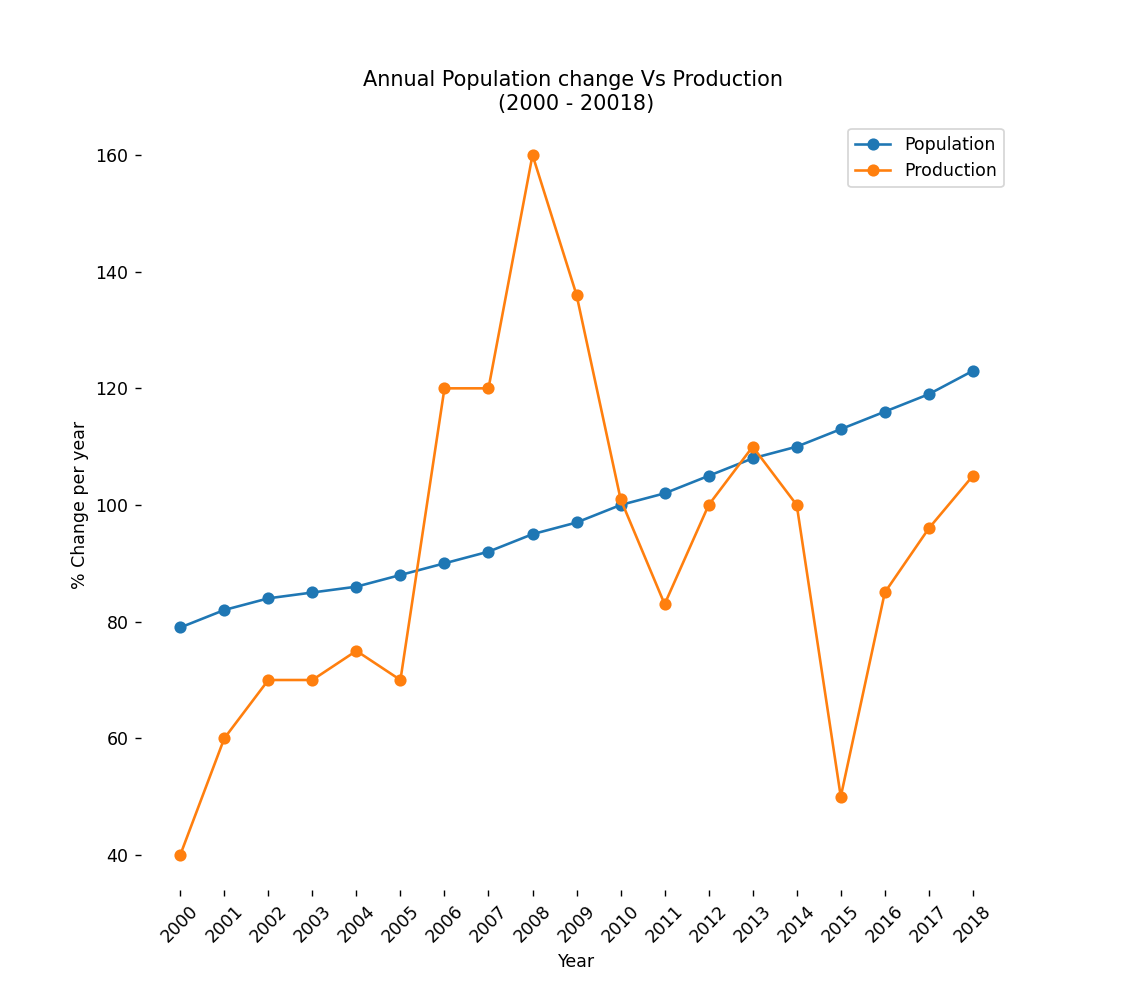

In [25]:
# Plotting the result
x = population['Year'].unique()
x.astype(int)

plt.figure(figsize=(9,8))
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.plot(x, population['% change per year'], '-o', x, production['% change per year'], '-o')

# Labels
plt.xlabel('Year')
plt.ylabel('% Change per year')
plt.title('Annual Population change Vs Production \n' + '(2000 - 20018)')
plt.legend(['Population', 'Production'])

# Rotate x axis
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)
    
# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)